2022-03-29 Ludovico Massaccesi

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Frequentist interval estimation
Take a Poisson and build the Neyman's bands for:

1. lower limit $\sum_{n=n_{min}(\mu)}^\infty p(n;\mu)=1-\sum_{n=0}^{n_{min}(\mu)-1}p(n;\mu)\geq CL$;
2. upper limit $\sum_{n=0}^{n_{max}(\mu)}p(n;\mu)\geq CL$;
3. central $\sum_{n=n_{max}(\mu)+1}^\infty p(n;\mu)=1-\sum_{n=0}^{n_{max}(\mu)}p(n;\mu)\leq\frac{1-CL}{2}$ and, separately, $\sum_{n=0}^{n_{min}(\mu)-1}p(n;\mu)\leq\frac{1-CL}{2}$; and
4. P-ordering $\sum_{n:p(n;\mu)>\bar p}p(n;\mu)\geq CL$.

In [26]:
mu = np.logspace(0, 2, 50)
n = np.arange(200)
mn, mmu = np.meshgrid(n, mu)
mcdf = poisson.cdf(mn, mmu)

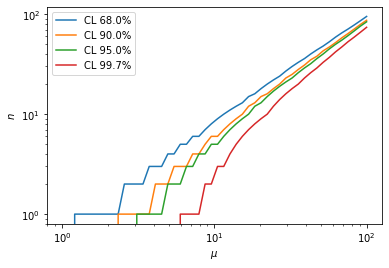

In [30]:
# Lower limit
plt.figure()
for cl in [0.68, 0.9, 0.95, 0.997]:
    nmin = np.argmax(1 - mcdf < cl, axis=1)
    plt.loglog(mu, nmin, '-', label=f"CL {cl:.1%}")
plt.legend()
plt.xlabel(r"$\mu$")
plt.ylabel("$n$")
plt.show()